# 📝 Pattern Recognition & Biometrics. TP Régression

Par Omar Galarraga et Sonia Garcia

L'objectif de ce travail pratique est de réaliser des tâches de régression : 

* Linéaire simple
* Multilinéaire (avec et sans régularisation)
* Non linéaire avec réseaux de neurones

Nous voudrons prédire le prix médian des maisons californiennes par quartier en fonction de plusieurs variables quantitatives. 

Commençons par charger les données et regarder la description de la base de données :


In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 

california_housing = fetch_california_housing(as_frame=True)

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

* 0.1) Montrez l'histogramme des variables (Piste : *california_housing.frame* contient une DataFrame de Pandas) 

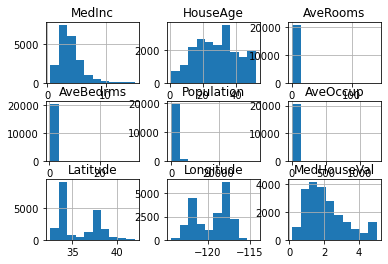

In [4]:
import matplotlib.pyplot as plt 

data = california_housing.frame
data.hist()
plt.show()

## Partie I. Régression linéaire simple

Calculez la matrice de corrélations.

* I.1) Si vous deviez choisir une seule variable pour réaliser une régression linéaire simple, laquelle choisiriez-vous ? Pourquoi ? 

In [5]:
cormat = data.corr()
print(cormat)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

On doit choisir la variable qui possède la plus grande corrélation avec notre cible. Ici notre cible est MedHouseVal et la variable la plus corrélée est 'MedInc'.

Nous voudrons créer un modèle $ \hat{y} = ax + b $, où $ \hat{y} $ est la prédiction du prix médian des maisons par quartier et $x$ est la caractéristique choisie en I.1.

* I.2) Quelles sont les valeurs optimales de $ a $ et $ b $ ? 

In [8]:
import numpy as np

x = data['MedInc']
y = data['MedHouseVal']

n = len(x)
mean_x = np.mean(x)
mean_y = np.mean(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

a = (sum_xy - n * mean_x * mean_y) / (sum_x_squared - n * mean_x**2)
b = mean_y - a * mean_x

# Afficher les coefficients
print("Coefficient a:", a)
print("Coefficient b:", b)

Coefficient a: 0.4179384920189389
Coefficient b: 0.4508557670327886


On utilise la formule analytique de la régression linéaire : 
- $ a = \frac{ \sum (x_i - \hat{x})(y_i - \hat{y})}{\sum (x_i - \hat{x} )}$
- $ b = \hat{y} - a*\hat{x}$

* I.3) Quelle est la valeur de $R^2$ ? Est-ce un bon ajustement ? Commentez
* I.4) Tracez la courbe de régression sur le nuage de points entre la sortie désirée et l'entrée

In [12]:
y_pred = a * x + b

ssr = np.sum((y_pred - mean_y)**2)
sst = np.sum((y - mean_y)**2)
r_squared = ssr / sst

print(f"Le R2 de cette régression est : {r_squared}.")

Le R2 de cette régression est : 0.4734474918071455


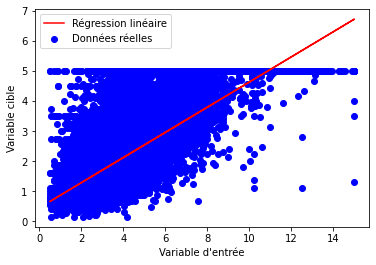

In [13]:
plt.scatter(x, y, color='blue', label='Données réelles')
plt.plot(x, y_pred, color='red', label='Régression linéaire')
plt.xlabel('Variable d\'entrée')
plt.ylabel('Variable cible')
plt.legend()

plt.show()

On trouve un R2 proche de 0.5 donc cela n'est pas une bonne nouvelle. On prédit 50% de faux pour 50% de vrai

* I.5) Quelle est l'erreur RMS de prédiction ? (en moyenne sur toutes les observations)

In [15]:
mse = np.mean((y_pred - y)**2)
rmse = np.sqrt(mse)

print(f"Erreur RMSE de prédiction : {rmse}")

Erreur RMSE de prédiction : 0.8373357452616906


## Partie II. Régression multilinéaire

Maintenant réalisez une régression linéaire en utilisant toutes les caractéristiques disponibles. 

* II.1) Quelle est l'erreur de prédiction ?
* II.2) Quelle est la valeur de $R^2$ ? L'ajustement est-il meilleur qu'avec une seule variable d'entrée ?
* II.3) Quels sont les coefficients associés aux variables d'entrée, ainsi que le terme indépendant ?

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

In [21]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Erreur RMSE de prédiction :", rmse)

r2 = r2_score(y, y_pred)
print("Coefficient de détermination R² :", r2)

Erreur RMSE de prédiction : 0.7241001216576387
Coefficient de détermination R² : 0.606232685199805


On obtient un R2 un peu plus grand que précédemment ce qi veut dire qu'on explicite un peu mieux le modèle.

In [24]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

intercept = model.intercept_

print("Coefficients associés aux variables d'entrée :\n", coefficients)
print("Terme indépendant (intercept) :", intercept)

Coefficients associés aux variables d'entrée :
      Variable  Coefficient
0      MedInc     0.436693
1    HouseAge     0.009436
2    AveRooms    -0.107322
3   AveBedrms     0.645066
4  Population    -0.000004
5    AveOccup    -0.003787
6    Latitude    -0.421314
7   Longitude    -0.434514
Terme indépendant (intercept) : -36.9419202071844


Le terme indépendant (intercept) est une valeur constante qui est ajoutée à la prédiction en l'absence de toutes les variables d'entrée.

## Partie III. Régression non linéaire avec réseaux de neurones

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{layer} = 3$ couches et avec $m=5$ neurones dans la couche cachée.

N'oubliez pas de normaliser les données en prétraitement. 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()
model.save("./model/model_reg.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [34]:
import netron 

netron.start('./model/model_reg.h5')

Serving './model/model_reg.h5' at http://localhost:8080


('localhost', 8080)

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
516/516 [==============================] - 2s 2ms/step - loss: 1.7231
Epoch 2/20
516/516 [==============================] - 1s 2ms/step - loss: 0.8379
Epoch 3/20
516/516 [==============================] - 1s 2ms/step - loss: 0.6501
Epoch 4/20
516/516 [==============================] - 1s 2ms/step - loss: 0.5444
Epoch 5/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4906
Epoch 6/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4635
Epoch 7/20
516/516 [==============================] - 1s 3ms/step - loss: 0.4461
Epoch 8/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4315
Epoch 9/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4203
Epoch 10/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4132
Epoch 11/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4081
Epoch 12/20
516/516 [==============================] - 1s 3ms/step - loss: 0.4015
Epoch 13/20
516/516 [====

In [37]:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Erreur de prédiction (loss) :", loss)

Erreur de prédiction (loss) : 0.36241793632507324



* III.1) Quelle est l'erreur RMS d'apprentissage ?

In [41]:
y_pred_train = model.predict(X_train_scaled).flatten()

mse_train = np.mean((y_pred_train - y_train)**2)
rmse_train = np.sqrt(mse_train)

print("Erreur RMSE d'apprentissage :", rmse_train)

516/516 [==============================] - 1s 2ms/step
Erreur RMSE d'apprentissage : 0.6139239366265802


On oublie pas de flatten la prediction car sinon on obtient une erreur car on a un problème de dimension.

* III.2) Pour une validation-croisée type K-Fold avec $K=10$ (mélangez l'ordre des observations), remplissez le tableau de RMSE de test ci-dessous selon les différents types de régression.

| Type de régression | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 |
|--------------------|---------|--------|--------|-------|--------|-------|---------|--------|--------|---------|
| Linéaire simple    |  |  |  |  |  |  |  |  |  |  |
| Multilinéaire     |  |  |  |  |  |  |  |  |  |  |
| Non linéaire avec NN    |  |  |  |  |  |  |  |  |  |  |


* III.3) Quelle est la méthode de régression la plus adaptée pour ce problème ? Justifiez

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

k = 10

regression_types = ['Linéaire simple', 'Multilinéaire', 'Non linéaire avec NN']

rmse_table = {rt: [] for rt in regression_types}

kf = KFold(n_splits=k, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lin_model = LinearRegression()
    lin_model.fit(X_train[['MedInc']], y_train)
    y_pred_lin = lin_model.predict(X_test[['MedInc']])
    rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
    rmse_table['Linéaire simple'].append(rmse_lin)
    
    multi_model = LinearRegression()
    multi_model.fit(X_train, y_train)
    y_pred_multi = multi_model.predict(X_test)
    rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
    rmse_table['Multilinéaire'].append(rmse_multi)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred_nn = model.predict(X_test_scaled).flatten()
    rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
    rmse_table['Non linéaire avec NN'].append(rmse_nn)

print("Tableau de RMSE de test :")
print(pd.DataFrame(rmse_table))

65/65 [==============================] - 0s 1ms/step
Tableau de RMSE de test :
   Linéaire simple  Multilinéaire  Non linéaire avec NN
0         0.843221       0.759125              0.619857
1         0.819706       0.713792              0.601092
2         0.829587       0.712799              0.609525
3         0.808815       0.700666              0.605598
4         0.854416       0.747236              0.616166
5         0.846157       0.725629              0.613656
6         0.848254       0.734986              0.657734
7         0.838958       0.718605              0.620154
8         0.853237       0.742495              0.625707
9         0.831106       0.713843              0.591139


Ici on va donc choisir le modèle linéaire avec réseau de neuronnes car il a le RMSE le plus bas à chaque étape.